# Testing with Postgres on Google cloud


See https://jira.lsstcorp.org/browse/DM-18007 for details of this setup.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.

C:\Users\salnikov\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## First test in fork mode (mostly)
Very first test is done in fork mode, with 15x15 tiling on a single 64-core client machine. It also includes small number of events which ran in MPI mode, again on a single 64-code machine, just for comparison with fork:
- events 1-11000 are all in for mode
- events 11001-11100 are in MPI mode
- events 11101-11200 are in MPI mode, with large memory configuration on server

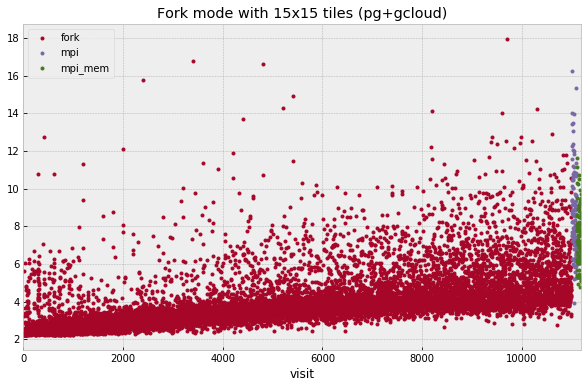

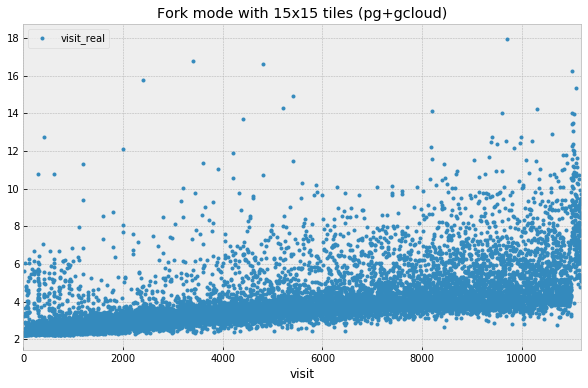

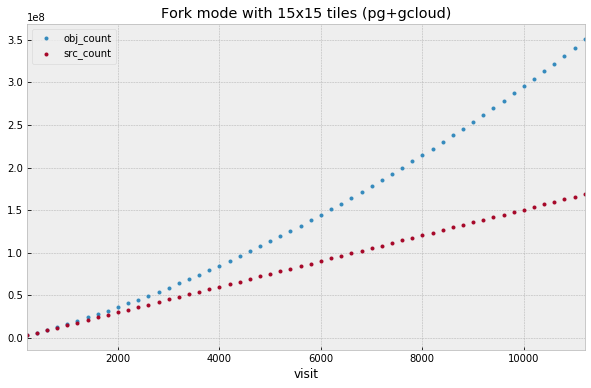

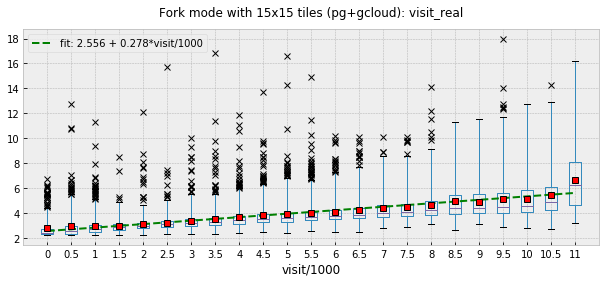

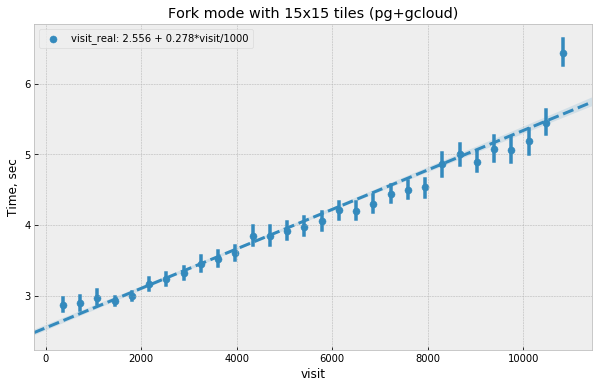

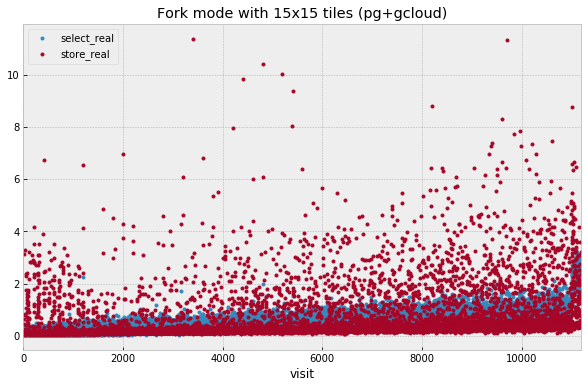

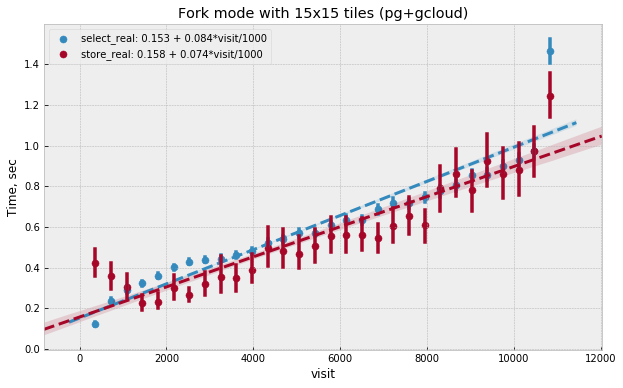

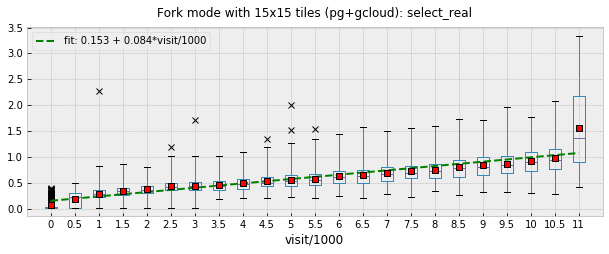

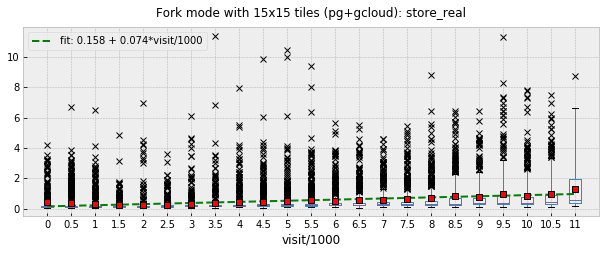

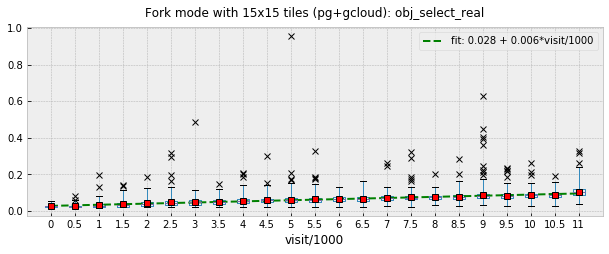

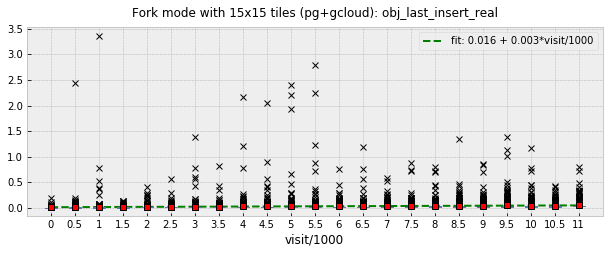

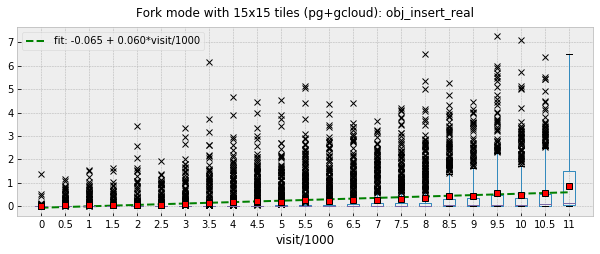

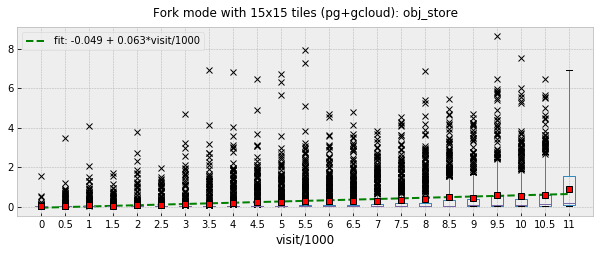

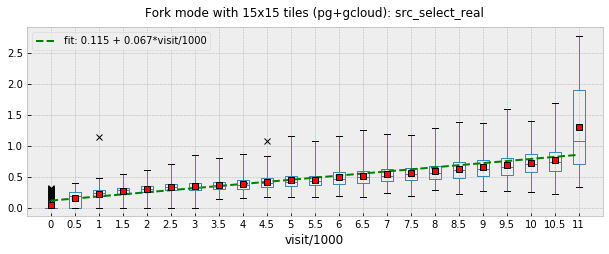

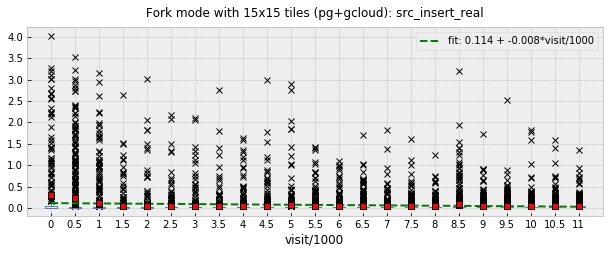

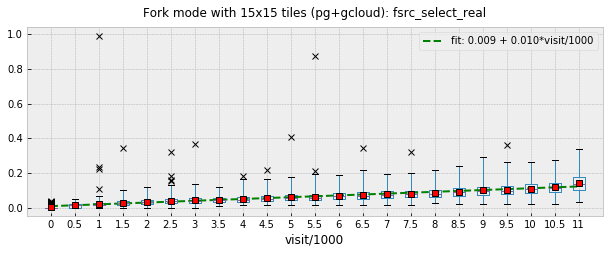

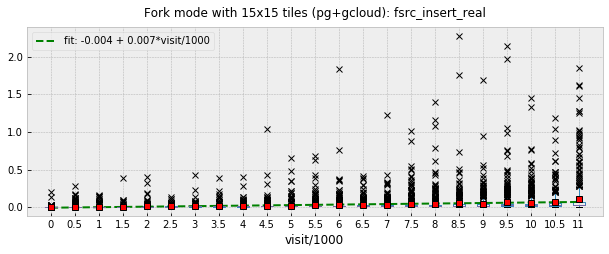

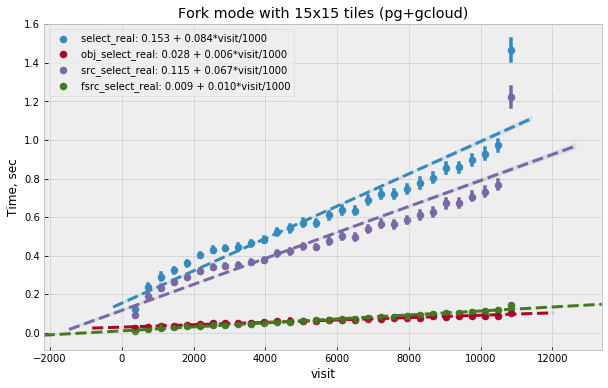

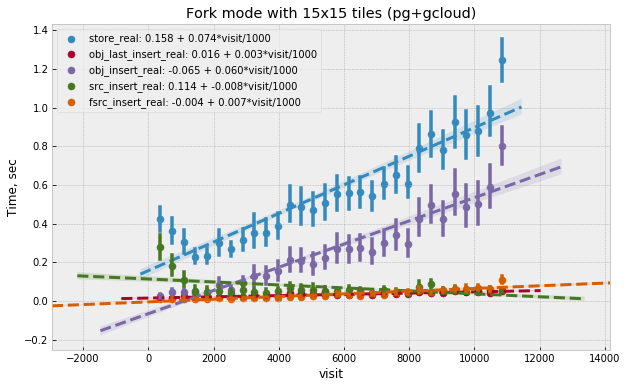

In [2]:
csv = "data/dm-17654-gcloud-pg-fork-15x15.csv.gz"
ds, dsc = plots._read_csv(csv)
ds_fork = ds[ds.index<=11000]
ds_mpi = ds[(ds.index>11000) & (ds.index<=11100)]
ds_mpi2 = ds[(ds.index>11100)]

title = "Fork mode with 15x15 tiles (pg+gcloud)"
ax = ds_fork.plot(y=["visit_real"], style=['.C1'], title=title, figsize=(10,6));
ds_mpi.plot(y=["visit_real"], style=['.C2'], ax=ax);
ds_mpi2.plot(y=["visit_real"], style=['.C3'], ax=ax);
ax.legend(['fork', 'mpi', 'mpi_mem'])

plots.do_plots(csv, title, bin=500, filter_count=True, whis=whiskers)
plots.do_plots_all(ds, title, bin=500, filter_count=True, plots=all_plots, whis=whiskers);

It looks like in MPI mode it runs slower, I guess there is too much contention on single machine, maybe we need couple more machies on client side to see if MPI behaves better in those conditions.

## More statistcs in fork mode

These plots include above statistics (without MPI mode) and extend it to 30k visits.

I have also messed with server parameters while things were running, in particular I changed tuning parameter `random_page_cost` from 4 to 1 (should work better on SSD) around visit 27k.

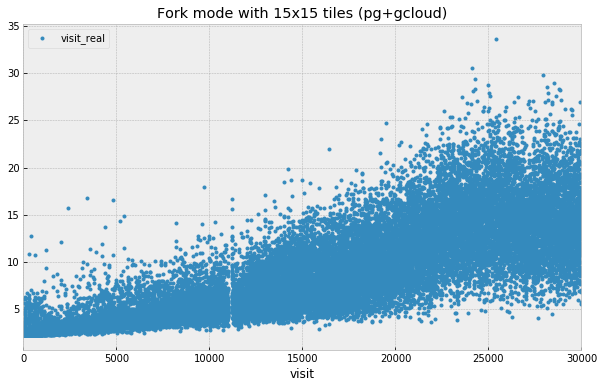

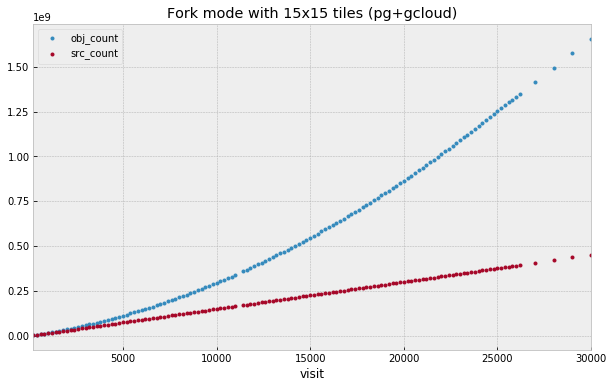

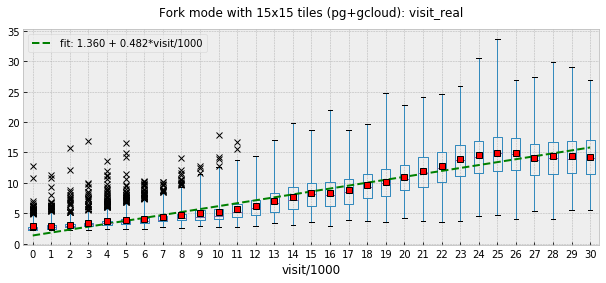

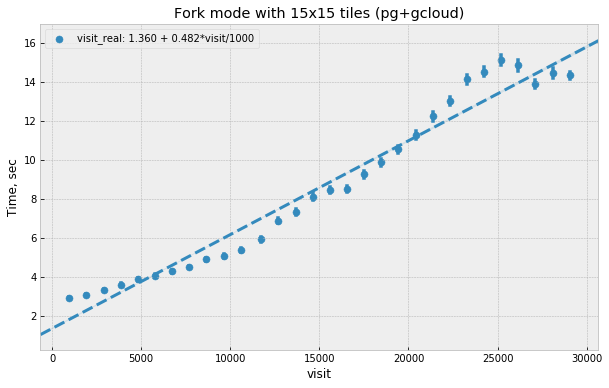

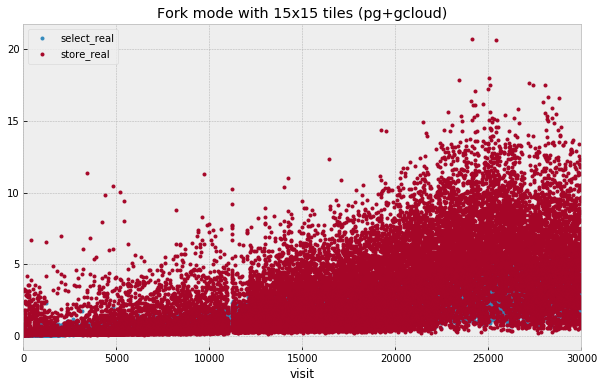

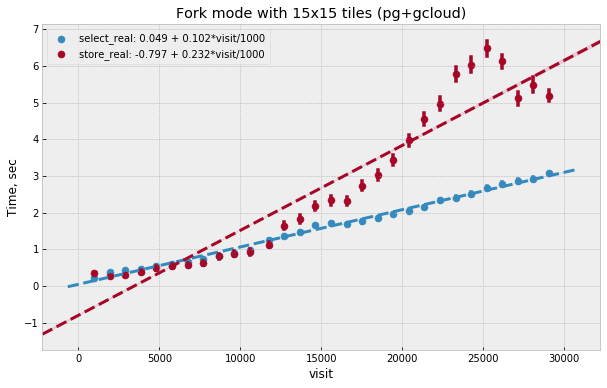

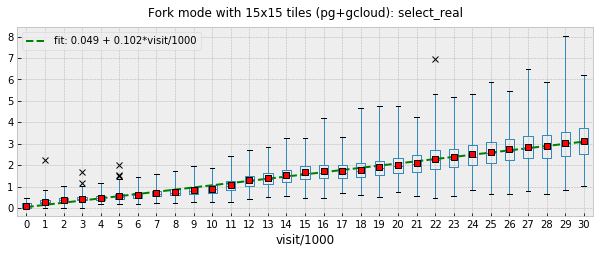

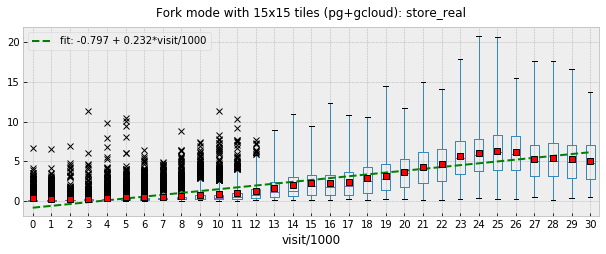

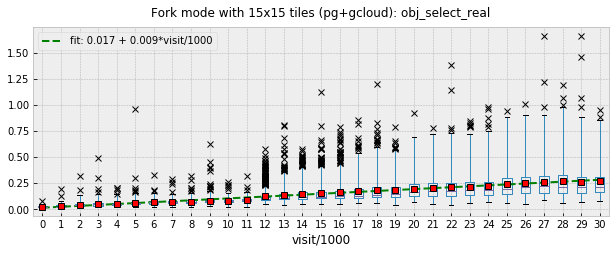

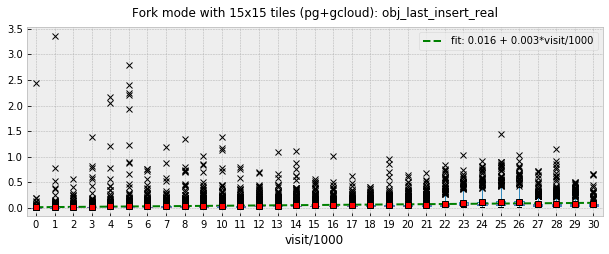

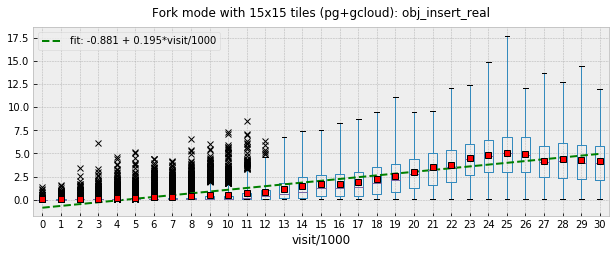

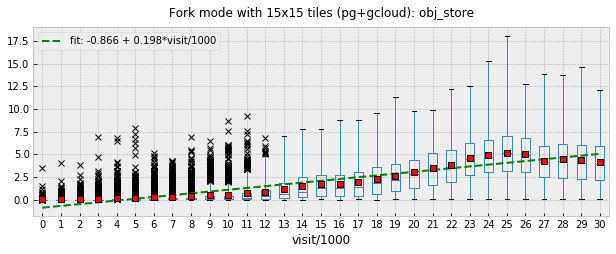

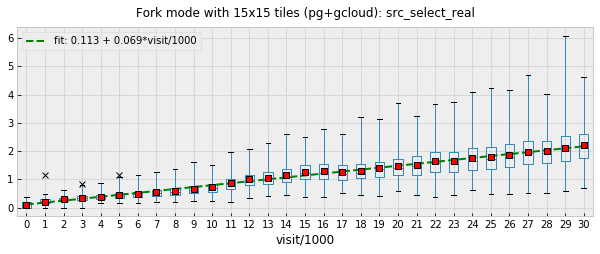

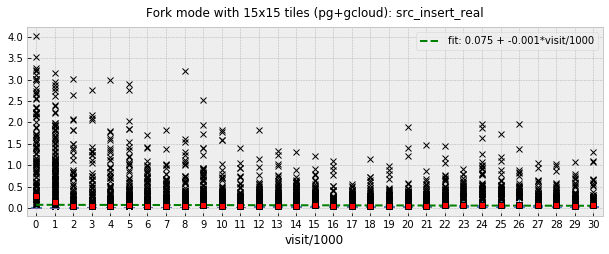

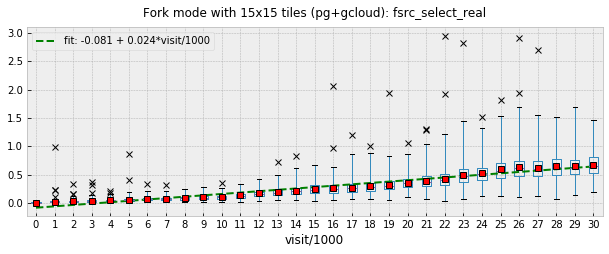

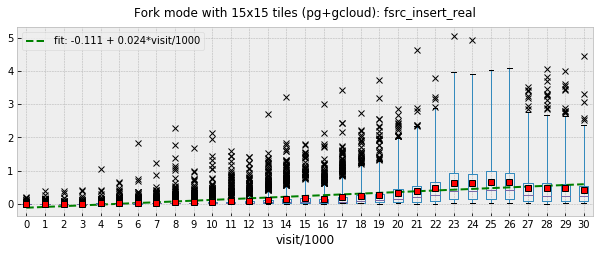

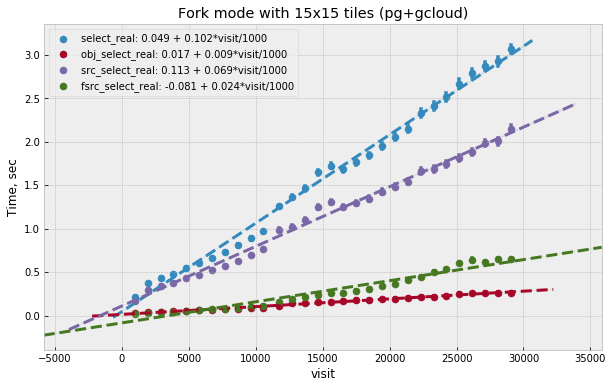

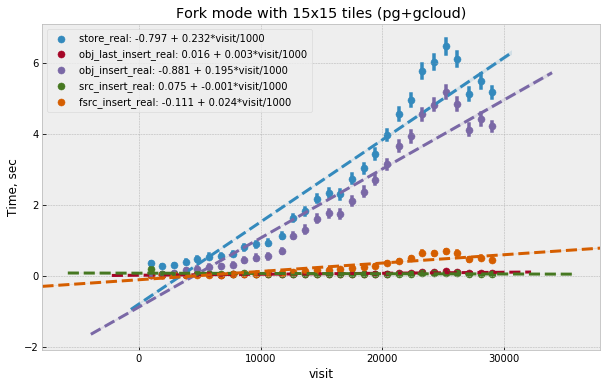

In [3]:
csv = "data/dm-17654-gcloud-pg-fork-15x15-30k.csv.gz"
title = "Fork mode with 15x15 tiles (pg+gcloud)"
ds = plots.do_plots(csv, title, bin=1000, filter_count=True, whis=whiskers)
plots.do_plots_all(ds, title, bin=1000, filter_count=True, plots=all_plots, whis=whiskers);

Read time from above plots looks linear. Writing time shows some drop after visit ~26k, not sure if it is related to my messing with parameters. It maybe worth repeating the same thing again to see how it behaves with stable parameters.

## One more re-try for 30k visits


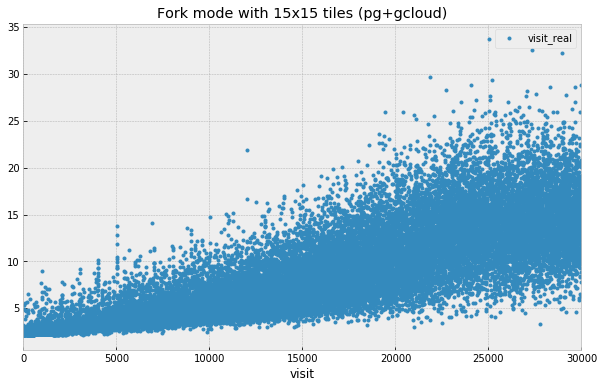

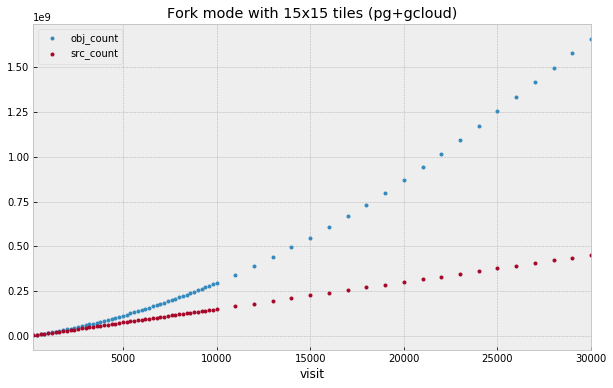

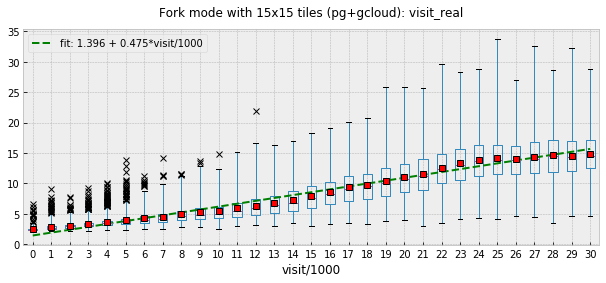

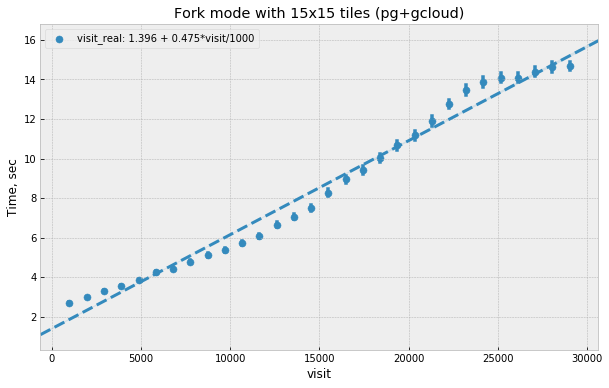

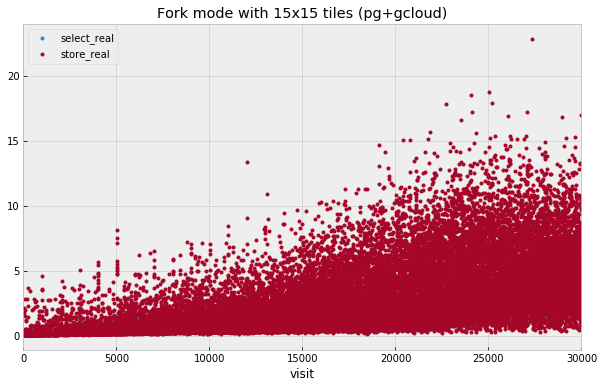

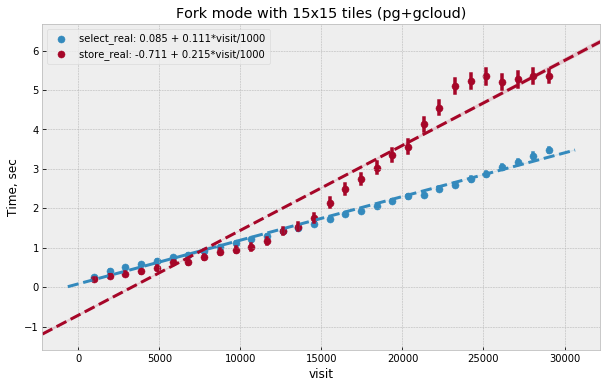

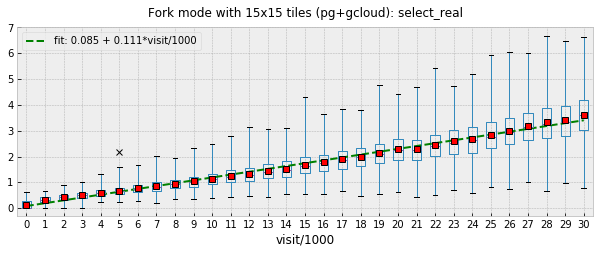

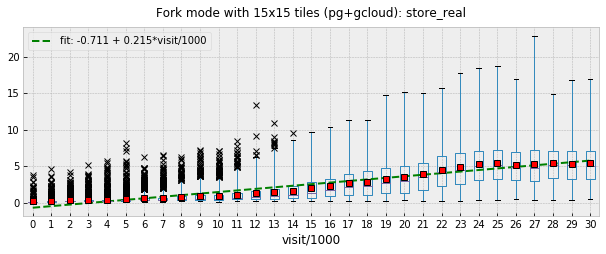

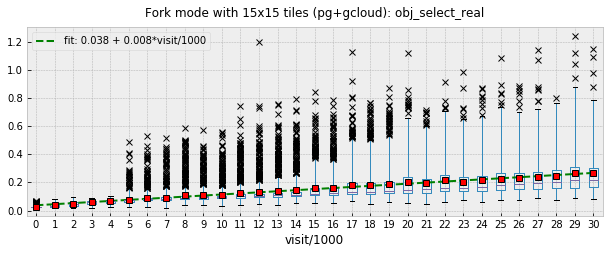

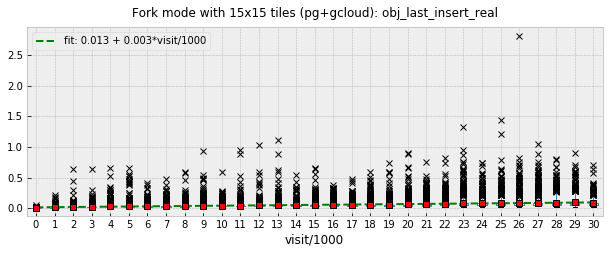

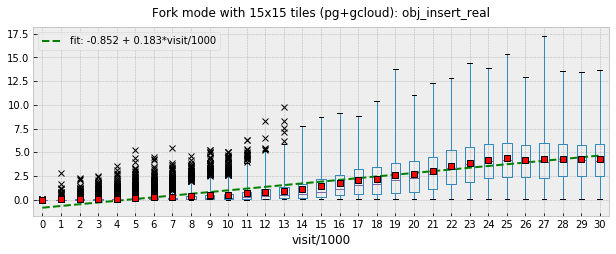

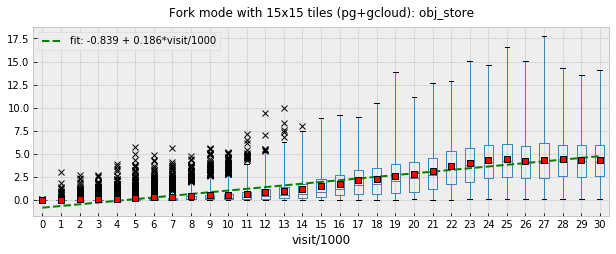

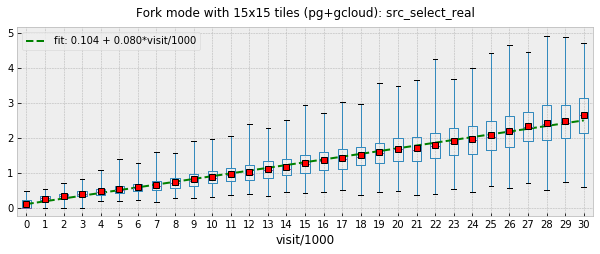

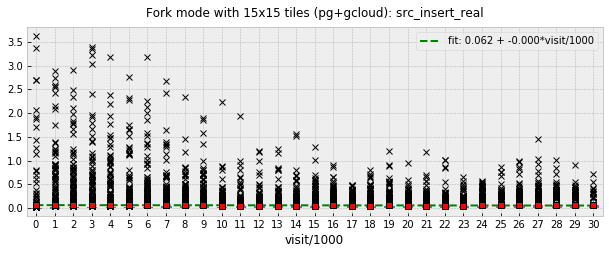

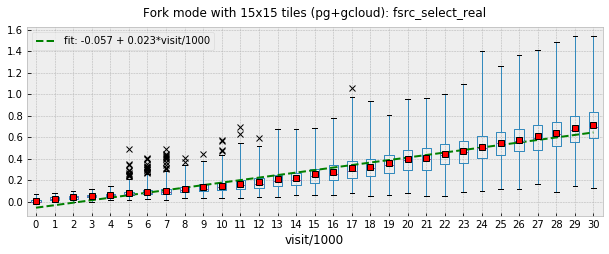

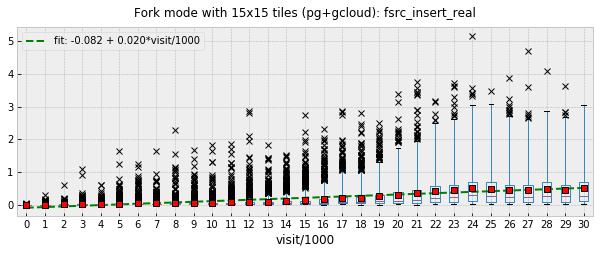

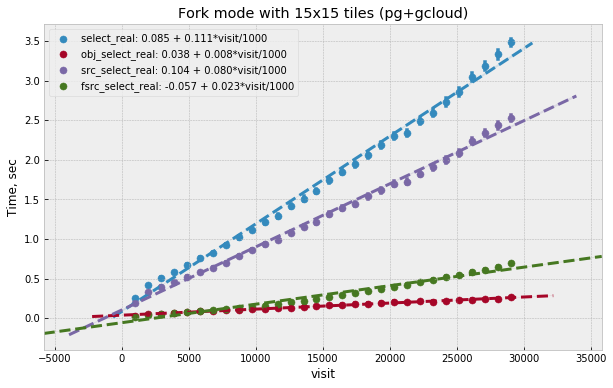

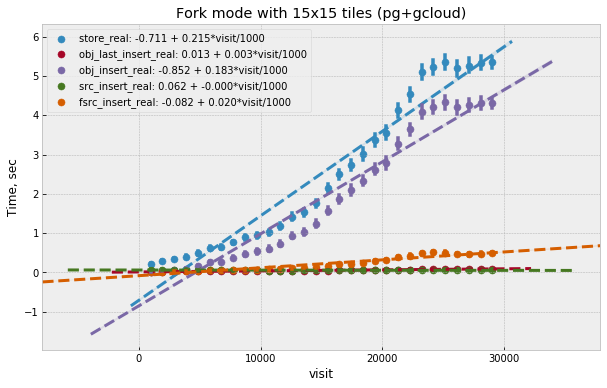

In [4]:
csv = "data/dm-17654-gcloud-pg-fork-take2-15x15.csv.gz"
title = "Fork mode with 15x15 tiles (pg+gcloud)"
ds = plots.do_plots(csv, title, bin=1000, filter_count=True, whis=whiskers)
plots.do_plots_all(ds, title, bin=1000, filter_count=True, plots=all_plots, whis=whiskers);

## Even more statistics

Extending previous test to 57k events


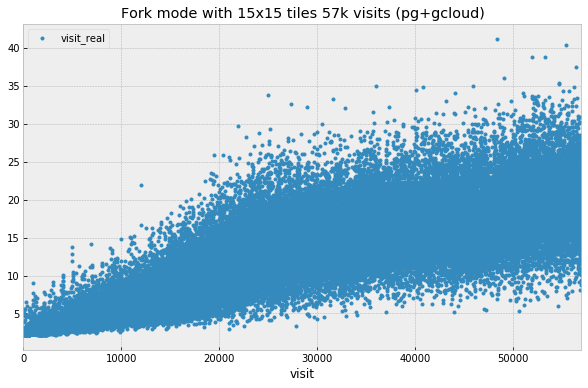

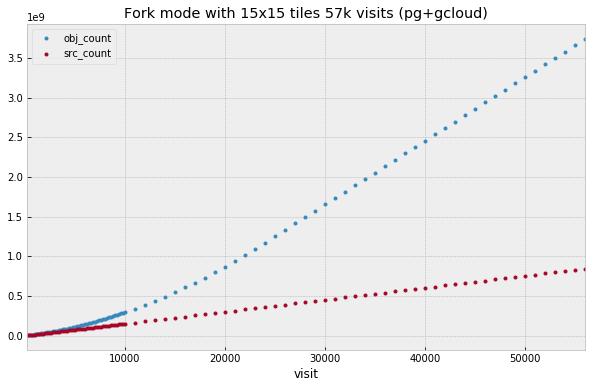

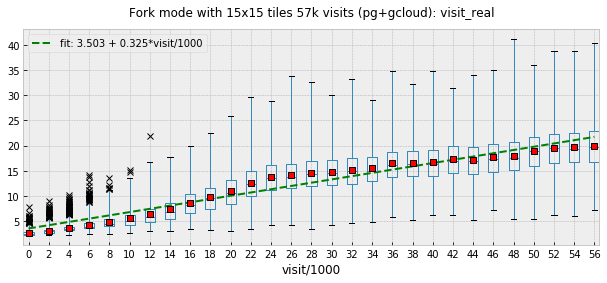

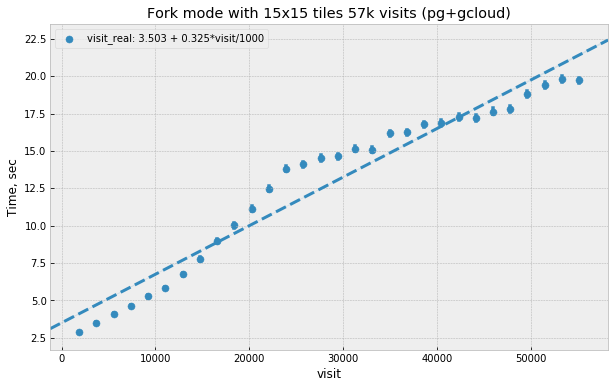

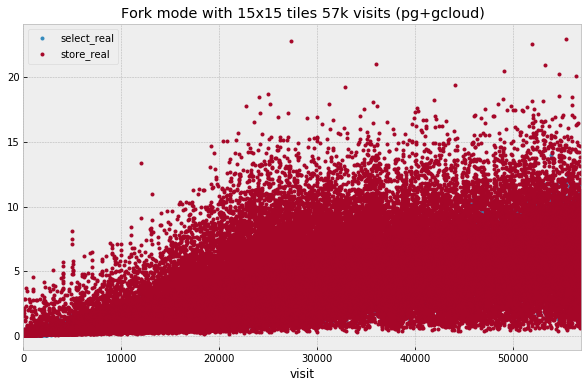

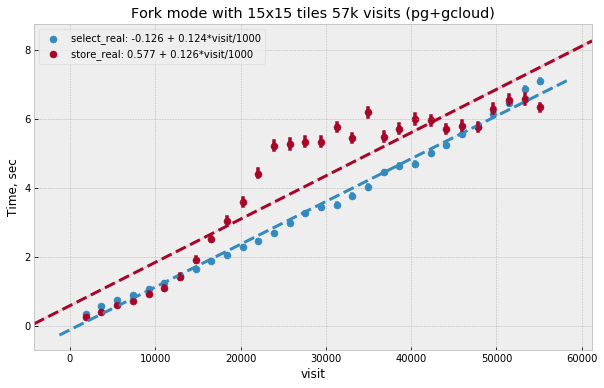

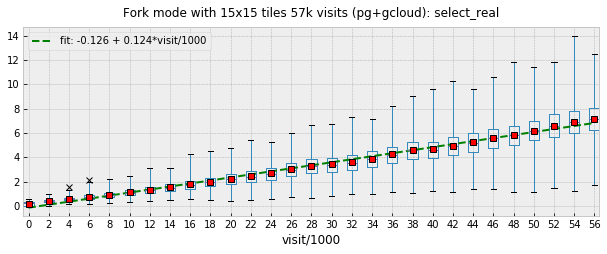

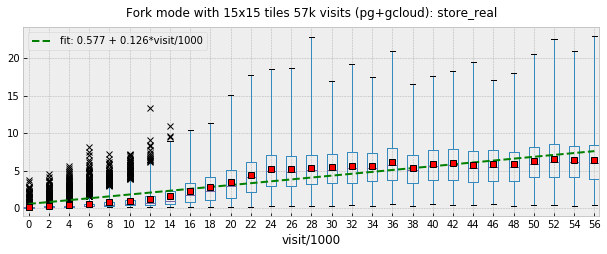

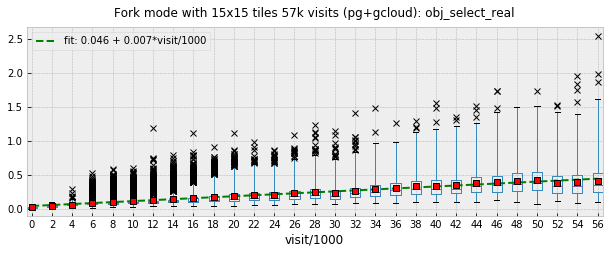

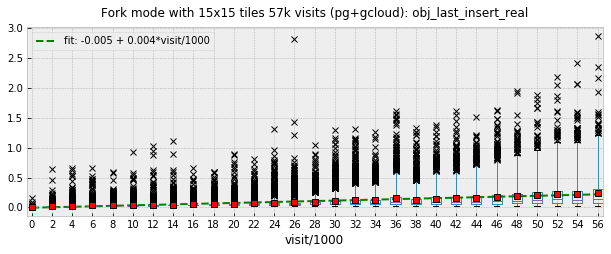

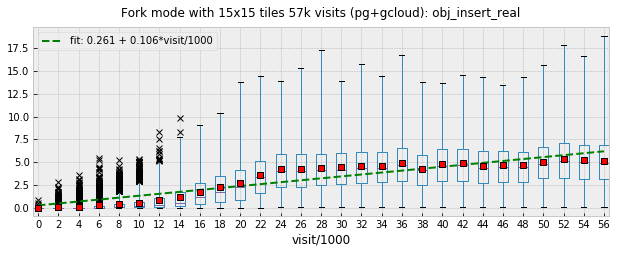

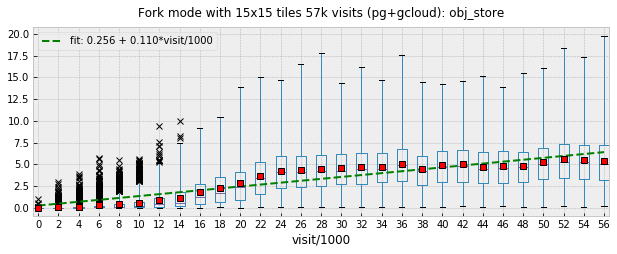

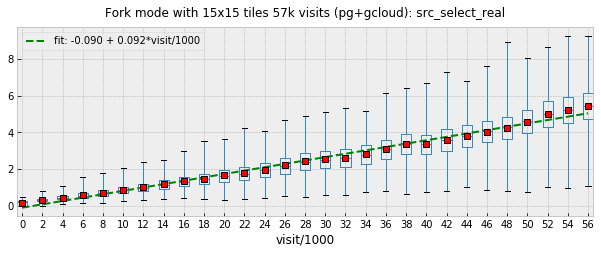

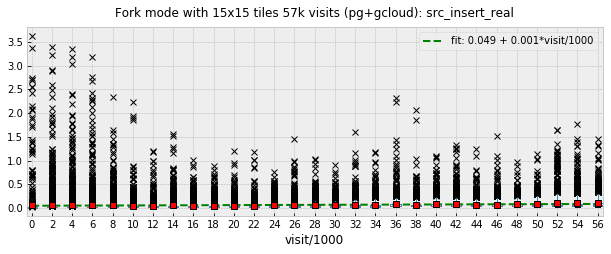

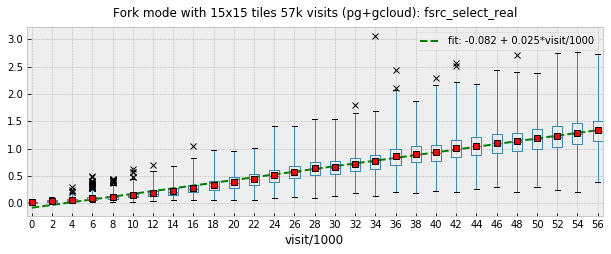

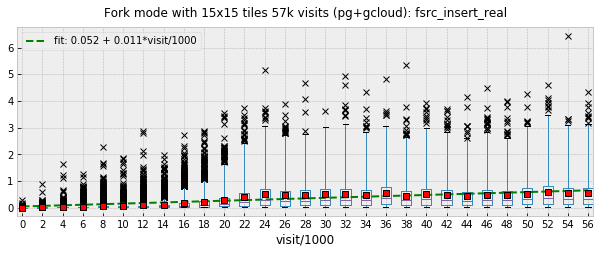

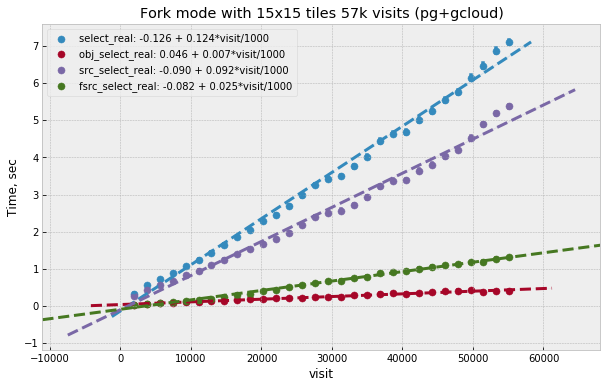

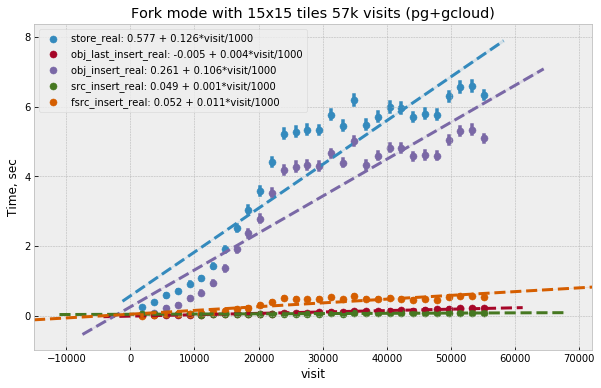

In [5]:
csv = "data/dm-17654-gcloud-pg-fork-take2-long-15x15.csv.gz"
title = "Fork mode with 15x15 tiles 57k visits (pg+gcloud)"
bad_visits=[48418]
ds = plots.do_plots(csv, title, bin=2000, filter_count=True, bad_visits=bad_visits, whis=whiskers)
plots.do_plots_all(ds, title, bin=2000, filter_count=True, plots=all_plots, bad_visits=bad_visits, whis=whiskers);

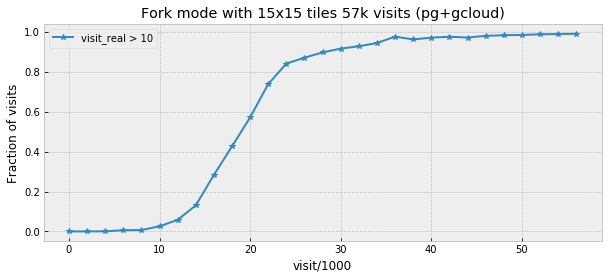

In [6]:
plots.plot_fraction_above(ds, "visit/1000", bin=2000, title=title)